# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [1]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm

fm.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

np.random.seed(0)
global_seed = 0

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [2]:
df_orig = pandas.read_csv('data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [3]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
572,สปาเก็ตตี้ที่มีสีแดง และเขียวตัดกับ สีของเส้นท...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
573,ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อ หมู ไก...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
574,สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลั...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
575,สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล


# **Data Preprocessing**

In [4]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [5]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเก็ตตี้'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเก็ตตี้มีทบอล', 'สปาเก็ตตี้คาโบนาร่า',
       'สปาเก็ตตี้ผัก', 'สปาเก็ตตี้ทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [6]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [7]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [8]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [9]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [10]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [11]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเก็ตตี้': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [12]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเก็ตตี้มีทบอล': 8,
 'สปาเก็ตตี้คาโบนาร่า': 9,
 'สปาเก็ตตี้ผัก': 10,
 'สปาเก็ตตี้ทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


## **Data Visualization**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

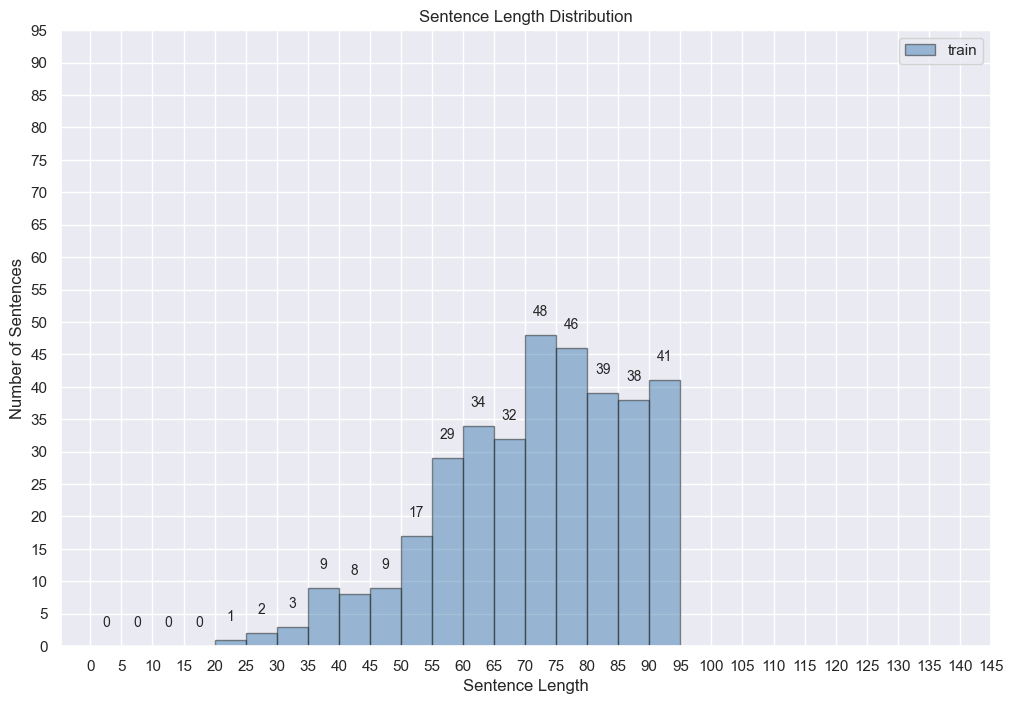

In [15]:
plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [16]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      88.333333
std       26.587477
min       20.000000
25%       69.750000
50%       86.000000
75%      107.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [17]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

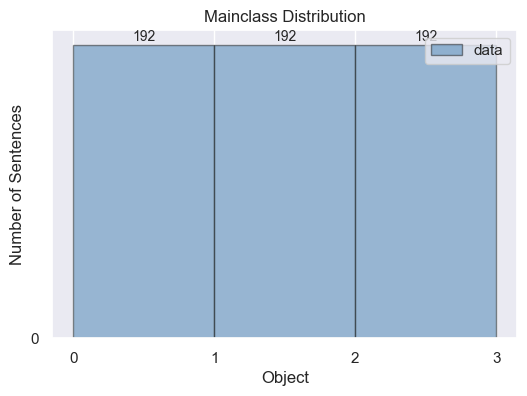

In [18]:
plot_label_distribution(df_prepro, 'Mainclass', 'Mainclass Distribution')

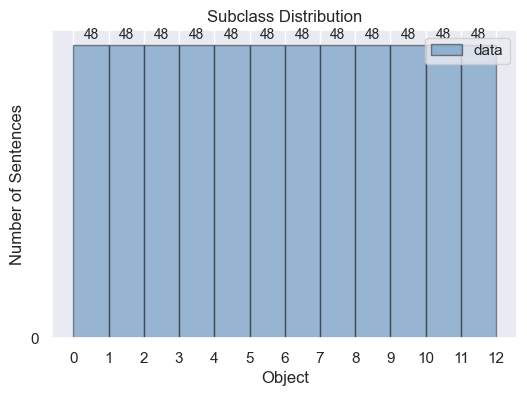

In [19]:
plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [20]:
df_keras = df_prepro.copy()

In [21]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

## **Word Tokenization**

In [22]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [23]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 2 10]
Data shape: (576, 3)
เท่ากับ 50


In [24]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:, 1]
subclass_labels = input_tokenize[:, 2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[0]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: 0
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


## **Word Count**

In [25]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16726),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [26]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1267
Maximum sentence length from data set: 50


## **Word Vectorization**

In [27]:
sentence[0]

array(['อยาก', 'กิน', 'กุ้ง', 'ที่จะ', 'มี', 'ความ', 'หนุบ', 'กับ',
       'น้ำสลัด', 'เทา', 'ซัน', 'ไอส์แลนด์', 'ที่', 'มี', 'ความ',
       'เข้มข้น', 'หอม', 'แป้ง', 'เยอะ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [28]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [29]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        return np.zeros(wordVector.vector_size)

sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)

print(f'Sentence vector shape: {sentence_vector.shape}')

Sentence vector shape: (576, 50, 300)


In [30]:
sentence_vector[0].shape

(50, 300)

In [31]:
sentence_vector[0][0].shape

(300,)

### **One-hot encoding**

In [32]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentence_vector, mainclass_labels, test_size=0.2, random_state=global_seed)

In [34]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (460, 50, 300)
y_train shape: (460, 3)
X_test shape: (116, 50, 300)
y_test shape: (116, 3)


Converting the data from numpy array to Tensorflow Dataset

In [35]:
tensor_X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
tensor_y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
tensor_X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
tensor_y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# **Modeling**

In [36]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

## **Main Class Model**

In [47]:
class MainclassPrediction(Model):
    def __init__(self, max_len, word_vector_size):
        super(MainclassPrediction, self).__init__()
        self.max_len = max_len
        self.max_vocab_size = max_vocab_size
        self.word_vector_size = word_vector_size
        self.class_name = ['Pizza', 'Noodle', 'Spaghetti']
        self.build_model()
        
    def build_model(self):
        self.input_layer = Input(shape=(self.max_len, self.word_vector_size), dtype='float32')
        self.conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(self.input_layer)
        self.bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(self.conv1d_layer_1)
        self.dropout_layer_1 = Dropout(0.2)(self.bi_lstm_layer_1)
        self.bi_lstm_layer_2 = Bidirectional(LSTM(32))(self.dropout_layer_1)
        self.denbse_layer_1 = Dense(32, activation='relu')(self.bi_lstm_layer_2)
        self.output_layer = Dense(3, activation='softmax')(self.denbse_layer_1)
        self.model = Model(inputs=self.input_layer, outputs=self.output_layer)
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.summary()
        
    def plot_model(self, model_path):
        img = plot_model(self.model, to_file=model_path, show_shapes=True, show_layer_names=True)
        display(img)

    def train(self, train_data, epochs, batch_size, validation_data = None, model_path=None):
        X_train, y_train = train_data
        if validation_data is not None:
            X_val, y_val = validation_data
            self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
        else:
            self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
        if model_path is not None:
            self.model.save(model_path)
            
    def predict(self, X_test):
        pred = self.model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        return pred
    
    def plot_result(self, y_test, y_pred):
        cr = classification_report(y_test, y_pred, target_names=self.class_name)
        print(cr)
        cm = confusion_matrix(y_test, y_pred)
        cmd = ConfusionMatrixDisplay(cm, display_labels=self.class_name)
        cmd.plot()
        plt.show()

In [48]:
mainclass_model = MainclassPrediction(max_len, 300)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 300)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 32)            28832     
                                                                 
 bidirectional_3 (Bidirectio  (None, 48, 64)           16640     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 48, 64)            0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                2080

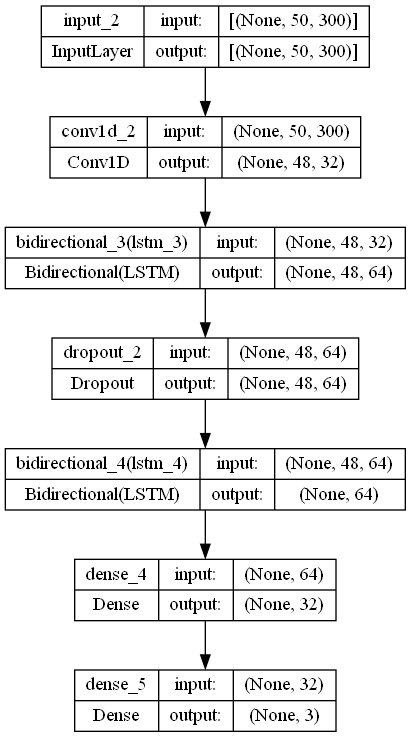

In [49]:
mainclass_model.plot_model('mainclass_model.png')

In [50]:
mainclass_model.train((tensor_X_train, tensor_y_train), epochs=15, batch_size=4)

Epoch 1/15
115/115 [==============================] - 6s 20ms/step - loss: 1.0626 - accuracy: 0.4413
Epoch 2/15
115/115 [==============================] - 2s 16ms/step - loss: 0.7644 - accuracy: 0.6652
Epoch 3/15
115/115 [==============================] - 2s 16ms/step - loss: 0.5770 - accuracy: 0.7435
Epoch 4/15
115/115 [==============================] - 2s 16ms/step - loss: 0.3346 - accuracy: 0.8717
Epoch 5/15
115/115 [==============================] - 2s 16ms/step - loss: 0.1882 - accuracy: 0.9435
Epoch 6/15
115/115 [==============================] - 2s 16ms/step - loss: 0.1797 - accuracy: 0.9348
Epoch 7/15
115/115 [==============================] - 2s 17ms/step - loss: 0.1385 - accuracy: 0.9500
Epoch 8/15
115/115 [==============================] - 2s 17ms/step - loss: 0.0732 - accuracy: 0.9739
Epoch 9/15
115/115 [==============================] - 2s 17ms/step - loss: 0.0295 - accuracy: 0.9870
Epoch 10/15
115/115 [==============================] - 2s 16ms/step - loss: 0.0042 - accura

In [51]:
pred = mainclass_model.predict(tensor_X_test)

4/4 [==============================] - 1s 8ms/step


              precision    recall  f1-score   support

       Pizza       0.73      0.91      0.81        33
      Noodle       0.83      0.88      0.85        40
   Spaghetti       0.91      0.70      0.79        43

    accuracy                           0.82       116
   macro avg       0.82      0.83      0.82       116
weighted avg       0.83      0.82      0.82       116



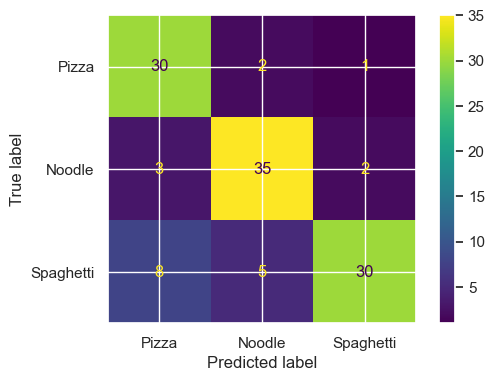

In [52]:
mainclass_model.plot_result(np.argmax(y_test, axis=1), pred)

## **Sub Class Model**

In [60]:
class SubclassPrediction(Model):
    def __init__(self, max_len, word_vector_size):
        super(SubclassPrediction, self).__init__()
        self.max_len = max_len
        self.max_vocab_size = max_vocab_size
        self.word_vector_size = word_vector_size
        self.class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11']
        self.build_model()
        
    def build_model(self):
        self.input_layer = Input(shape=(self.max_len, self.word_vector_size), dtype='float32')
        self.conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(self.input_layer)
        self.bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(self.conv1d_layer_1)
        self.dropout_layer_1 = Dropout(0.2)(self.bi_lstm_layer_1)
        self.global_max_pooling_layer_1 = GlobalMaxPooling1D()(self.dropout_layer_1)
        self.denbse_layer_1 = Dense(32, activation='relu')(self.global_max_pooling_layer_1)
        self.output_layer = Dense(12, activation='softmax')(self.denbse_layer_1)
        self.model = Model(inputs=self.input_layer, outputs=self.output_layer)
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.summary()
        
    def plot_model(self, model_path):
        img = plot_model(self.model, to_file=model_path, show_shapes=True, show_layer_names=True)
        display(img)

    def train(self, train_data, epochs, batch_size, validation_data = None, model_path=None):
        X_train, y_train = train_data
        if validation_data is not None:
            X_val, y_val = validation_data
            self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
        else:
            self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
        if model_path is not None:
            self.model.save(model_path)
            
    def predict(self, X_test):
        pred = self.model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        return pred
    
    def plot_result(self, y_test, y_pred):
        cr = classification_report(y_test, y_pred, target_names=self.class_name)
        print(cr)
        cm = confusion_matrix(y_test, y_pred)
        cmd = ConfusionMatrixDisplay(cm, display_labels=self.class_name)
        cmd.plot()
        plt.show()

In [53]:
# input_layer = Input(shape=(50, 300), dtype='float32', name='input_layer')
# conv = Conv1D(64, 3, activation='relu')(input_layer)
# bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(conv)
# drop = Dropout(0.2)(bi_lstm)
# bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(drop)
# dense = Dense(64, activation='relu')(bi_lstm)
# dense = Dense(32, activation='relu')(dense)
# flat = Flatten()(dense)
# dense = Dense(16, activation='relu')(flat)
# dense = Dense(8, activation='relu')(dense)
# output_layer = Dense(3, activation='softmax')(dense)
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

# input_layer = Input(shape=(50, 300), dtype='float32', name='input_layer')
# conv = Conv1D(32, 3, activation='relu')(input_layer)
# bi_lstm = Bidirectional(LSTM(32, return_sequences=True))(conv)
# drop = Dropout(0.2)(bi_lstm)
# pool = GlobalMaxPooling1D()(drop)
# dense = Dense(32, activation='relu')(pool)
# output_layer = Dense(12, activation='softmax')(dense)
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 48, 32)            28832     
                                                                 
 bidirectional_5 (Bidirectio  (None, 48, 64)           16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 48, 64)            0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                2080

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50, 300)]         0         
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 32)            28832     
                                                                 
 bidirectional_7 (Bidirectio  (None, 48, 64)           16640     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 48, 64)            0         
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 32)                2080

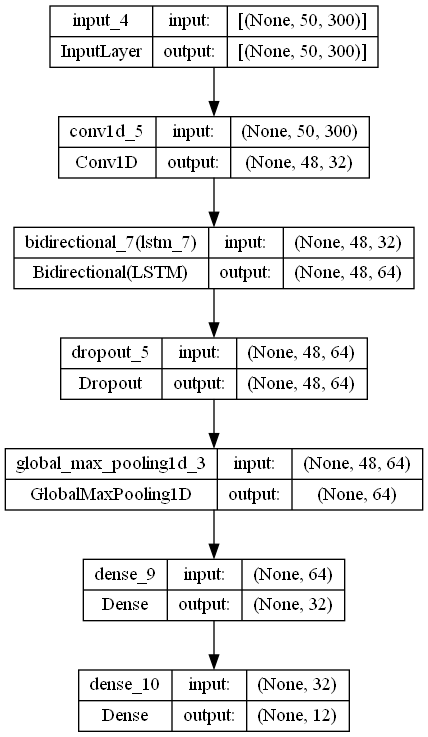

In [61]:
subclass_model = SubclassPrediction(max_len, 300)

subclass_model.plot_model('subclass_model.png')

# **Evaluation**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

print(classification_report(np.argmax(y_test, axis=1), pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        33
           1       0.83      0.88      0.85        40
           2       0.91      0.70      0.79        43

    accuracy                           0.82       116
   macro avg       0.82      0.83      0.82       116
weighted avg       0.83      0.82      0.82       116



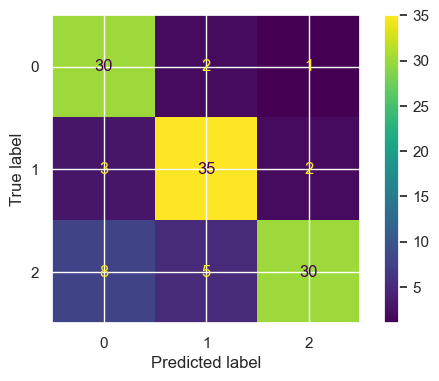

In [56]:
# plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2'])
disp.plot()